In [1]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [2]:
torch.manual_seed(321)
# 이미지 크기를 100 x 100 로 조정합니다
IMAGE_SIZE = 224

In [3]:
original_dataset=ImageFolder(root="data/flower_photos",
                             transform=transforms.Compose([
                                 transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                 transforms.ToTensor()
                             ]))
type(original_dataset)

torchvision.datasets.folder.ImageFolder

In [4]:
original_loader=DataLoader(original_dataset,
                           batch_size=100,
                            shuffle=False,
                             num_workers=1)

In [5]:
original_images, labels=next(iter(original_loader))
print(original_images.shape)
print(labels.shape)

torch.Size([100, 3, 224, 224])
torch.Size([100])


In [6]:
print(labels)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])


In [7]:
original_images[0]

tensor([[[0.5333, 0.5490, 0.5686,  ..., 0.6039, 0.6039, 0.5922],
         [0.5294, 0.5451, 0.5647,  ..., 0.6039, 0.6039, 0.5882],
         [0.5255, 0.5451, 0.5647,  ..., 0.6000, 0.6000, 0.5804],
         ...,
         [0.1765, 0.1725, 0.1725,  ..., 0.5098, 0.5098, 0.5059],
         [0.1725, 0.1725, 0.1725,  ..., 0.5137, 0.5098, 0.5098],
         [0.1725, 0.1725, 0.1725,  ..., 0.5176, 0.5176, 0.5176]],

        [[0.5333, 0.5490, 0.5686,  ..., 0.6039, 0.6039, 0.5922],
         [0.5294, 0.5451, 0.5647,  ..., 0.6039, 0.6039, 0.5882],
         [0.5255, 0.5451, 0.5647,  ..., 0.6000, 0.6000, 0.5804],
         ...,
         [0.1882, 0.1843, 0.1843,  ..., 0.4941, 0.4941, 0.4902],
         [0.1843, 0.1843, 0.1843,  ..., 0.4980, 0.4941, 0.4941],
         [0.1843, 0.1843, 0.1843,  ..., 0.5020, 0.5020, 0.5020]],

        [[0.5255, 0.5490, 0.5686,  ..., 0.5961, 0.6039, 0.5922],
         [0.5216, 0.5412, 0.5647,  ..., 0.5961, 0.6039, 0.5882],
         [0.5176, 0.5373, 0.5608,  ..., 0.5961, 0.6000, 0.

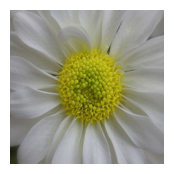

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.imshow(original_images[0].permute(1, 2, 0))
plt.grid(False)
plt.axis('off')
plt.show()

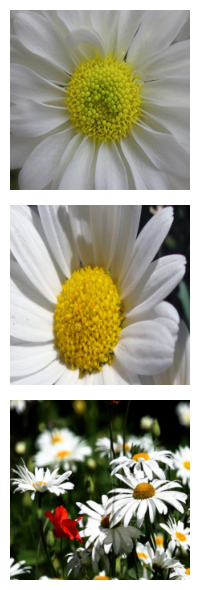

In [9]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches(4, 6)

for idx in range(3):
    axes[idx].imshow(original_images[idx].permute(1,2,0))
    axes[idx].set_axis_off()
fig.tight_layout()
plt.show()

In [10]:
image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [11]:
transform_data=ImageFolder(root="data/flower_photos",
                           transform=image_transform)

In [12]:
transform_loader=DataLoader(transform_data,
                            batch_size=100,
                            shuffle=False,
                            num_workers=1)

In [13]:
transform_images, transform_labels=next(iter(transform_loader))
print(transform_images.shape, transform_labels.shape)

torch.Size([100, 3, 224, 224]) torch.Size([100])


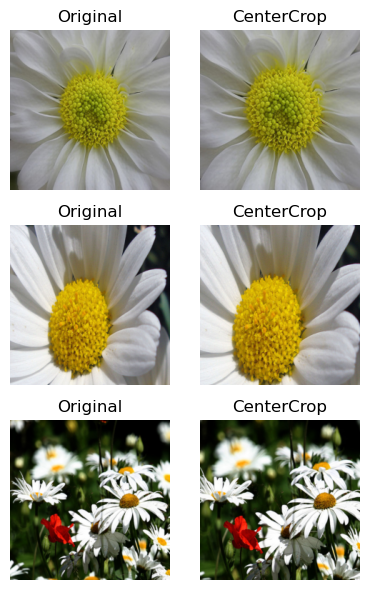

In [14]:
fig, axes=plt.subplots(3,2)
fig.set_size_inches(4, 6)
for idx in range(3):
    axes[idx, 0].imshow(original_images[idx].permute(1,2,0))
    axes[idx, 0].set_axis_off()
    axes[idx, 0].set_title("Original")
    axes[idx, 1].imshow(transform_images[idx].permute(1,2,0))
    axes[idx, 1].set_axis_off()
    axes[idx, 1].set_title("CenterCrop")
fig.tight_layout()
plt.show()

In [15]:
def create_loader(transform):
    # 이미지 폴더로부터 데이터를 로드합니다.
    transform_dataset = ImageFolder(root='data/flower_photos', # 다운로드 받은 폴더의 root 경로를 지정합니다.
                                    transform=transform)

    # 데이터 로더를 생성합니다.
    transform_loader = DataLoader(transform_dataset,      # 이전에 생성한 transform_dataset를 적용합니다.
                                  batch_size=16,          # 배치사이즈
                                  shuffle=False,          # 셔플 여부
                                  num_workers=1 
                                 )
    
    transform_images, labels = next(iter(transform_loader))
    
    fig, axes = plt.subplots(3, 2)
    fig.set_size_inches(4, 6)

    for idx in range(3):
        axes[idx, 0].imshow(original_images[idx].permute(1, 2, 0))
        axes[idx, 0].set_axis_off()
        axes[idx, 0].set_title('Original')
        axes[idx, 1].imshow(transform_images[idx].permute(1, 2, 0))
        axes[idx, 1].set_axis_off()
        axes[idx, 1].set_title('Transformed')
    
    fig.tight_layout()
    plt.show()


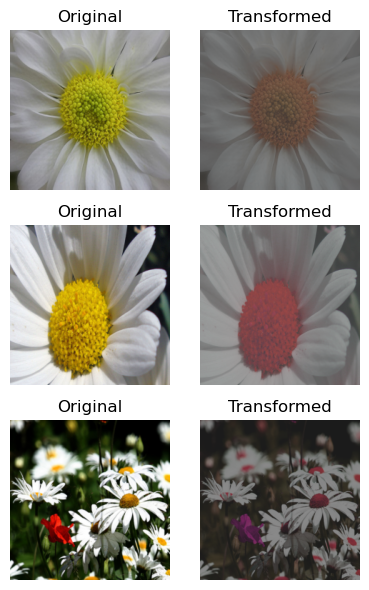

In [16]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # ColorJitter 적용
    transforms.ColorJitter(brightness=(0.5, 0.9), 
                           contrast=(0.4, 0.8), 
                           saturation=(0.7, 0.9),
                           hue=(-0.2, 0.2),
                          ),
    transforms.ToTensor()
])
create_loader(image_transform)

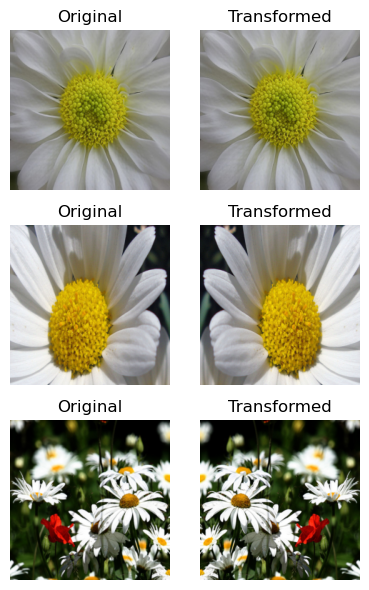

In [23]:
mage_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),
    transforms.ToTensor()
])
create_loader(mage_transform)

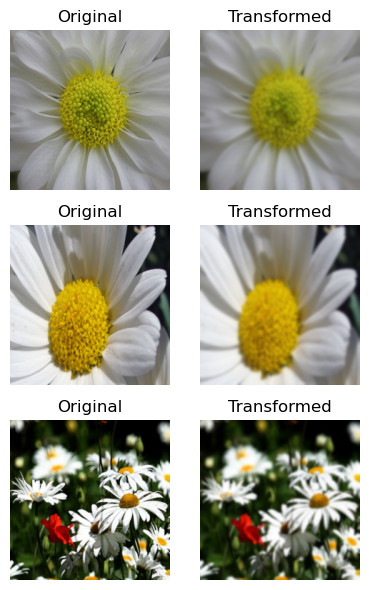

In [24]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # GaussianBlur 적용
    transforms.GaussianBlur(kernel_size=(19, 19), sigma=(1.0, 2.0)),
    transforms.ToTensor()
])
create_loader(image_transform)

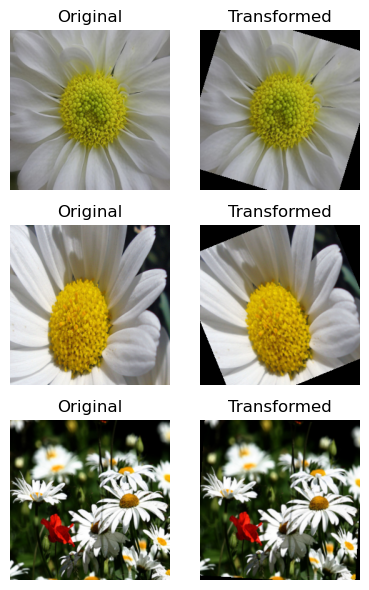

In [25]:
image_transform = transforms.Compose([ #회전
    transforms.Resize((256, 256)),              
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-30, 30), interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])
create_loader(image_transform)

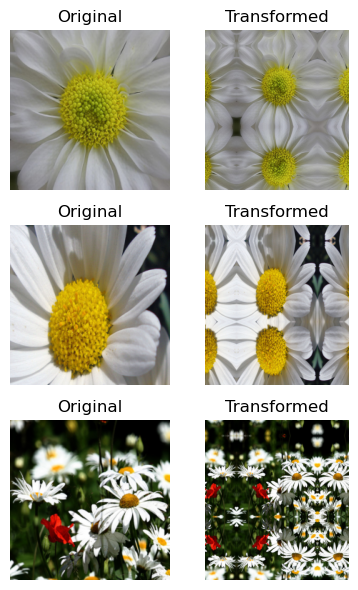

In [26]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # Pad 적용
    transforms.Pad(padding=(100, 50, 100, 200), fill=255, padding_mode='symmetric'),
    transforms.ToTensor()
])
create_loader(image_transform)

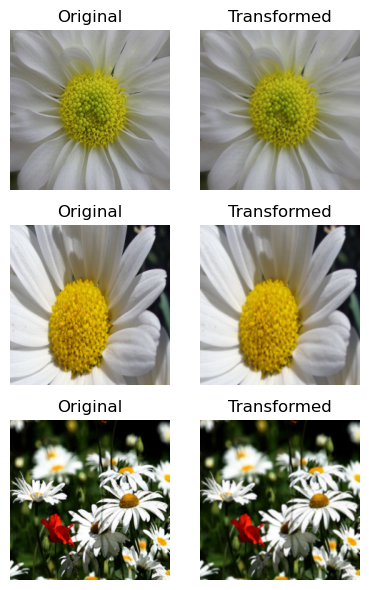

In [27]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # RandomAdjustSharpness 적용
    transforms.RandomAdjustSharpness(sharpness_factor=0.1, p=0.9),
    transforms.ToTensor()
])
create_loader(image_transform)

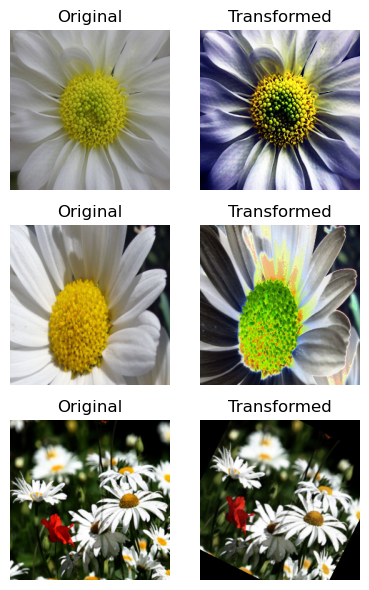

In [28]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # AutoAugment 적용
    transforms.AutoAugment(policy=transforms.autoaugment.AutoAugmentPolicy.IMAGENET, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.ToTensor()
])
create_loader(image_transform)